# **🧮 Task 4: Predicting Insurance Claim Amounts**

## **🎯 Objective:**
Estimate the medical insurance claim amount based on personal data.

## **📊 Dataset:**
**Medical Cost Personal Dataset**

## ✅ **Instructions:**
➡️ Train a **Linear Regression** model to predict **charges**
➡️ 📉 Visualize how **BMI**, **age**, and **smoking status** impact insurance charges
➡️ 📏 Evaluate model performance using **MAE** (Mean Absolute Error) and **RMSE** (Root Mean Squared Error)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the dataset

### Subtask:
Load the `insurance.csv` dataset from Google Drive into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Explore and preprocess the data

### Subtask:
Handle any missing values, encode categorical features, and split the data into training and testing sets.


**Reasoning**:
Check for missing values and handle them, then encode categorical features using one-hot encoding, separate features and target, and finally split the data into training and testing sets.



In [ ]:
# 1. Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Since there are no missing values, no imputation or dropping is needed.

# 2. Identify categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Separate features and target variable
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 4. Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Missing values before handling:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Train a linear regression model

### Subtask:
Train a Linear Regression model on the training data (`X_train`, `y_train`) to predict insurance charges.


**Reasoning**:
Import the LinearRegression model and fit it to the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Visualize the impact of features

### Subtask:
Create visualizations to show how BMI, age, and smoking status impact insurance charges.


**Reasoning**:
Create scatter plots for 'age' vs 'charges' and 'bmi' vs 'charges', and a box plot for 'smoker' vs 'charges' to visualize their relationships and impact on insurance charges.



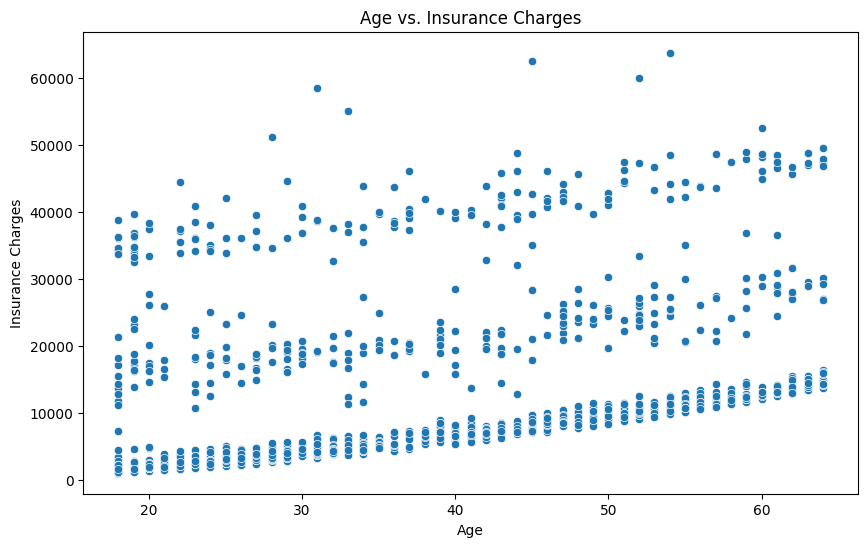

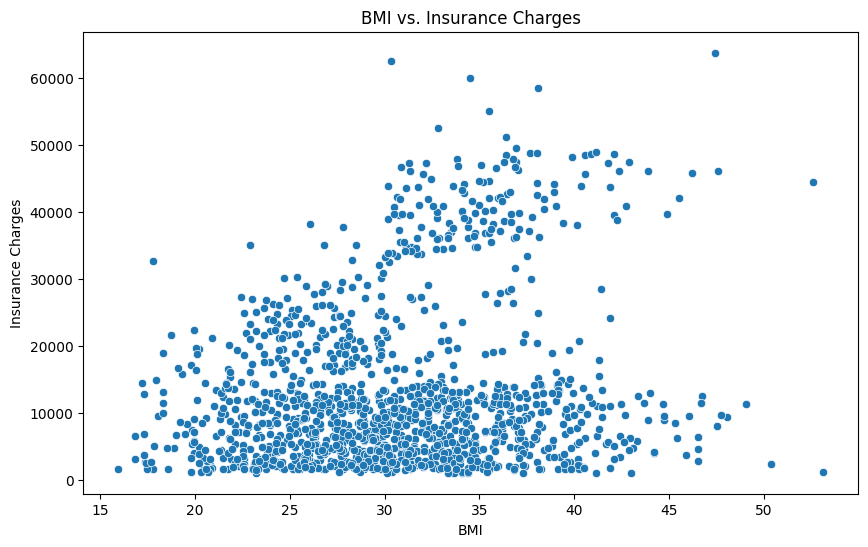

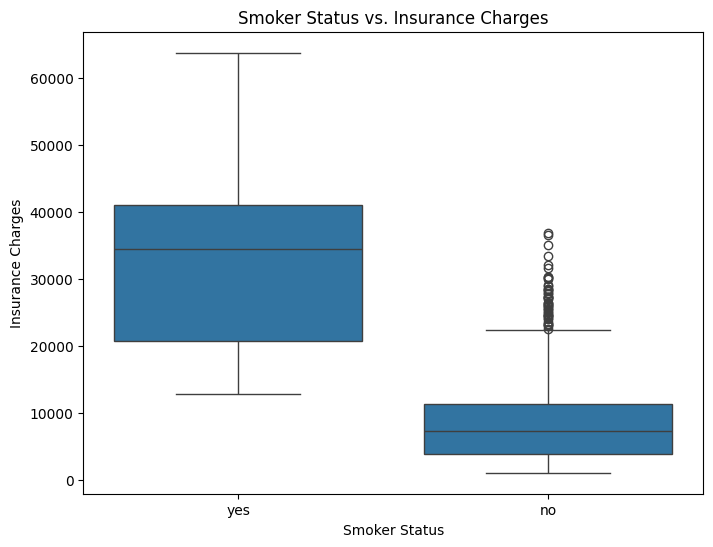

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for age vs charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs. Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

# Create scatter plot for bmi vs charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs. Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

# Create box plot for smoker vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoker Status vs. Insurance Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Charges')
plt.show()

## Evaluate model performance

### Subtask:
Calculate and display the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) of the model on the testing data.


**Reasoning**:
Calculate and display the MAE and RMSE of the model on the testing data as instructed.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the testing features
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 4181.19
Root Mean Squared Error: 5796.28


# 📋 **Summary**

### 🔍 **Data Analysis Key Findings**

* ✅ There are **no missing values** in the dataset.
* 📊 The trained **Linear Regression** model achieved:

  * **Mean Absolute Error (MAE):** \~\$4181.19
  * **Root Mean Squared Error (RMSE):** \~\$5796.28
* 📈 Visualizations show:

  * A **positive relationship** between **age** and **insurance charges**
  * A **moderate positive relationship** between **BMI** and charges
  * 🚬 **Smokers** have **significantly higher charges** than non-smokers

### 💡 **Insights or Next Steps**

* 📏 The MAE and RMSE suggest the model gives **reasonable but not perfect** predictions.
* 🔥 **Smoking status** seems to be a **major factor** influencing charges, as shown in visualizations.
* 🧠 Consider using **feature importance analysis** or more advanced models for better insights and accuracy.